In [1]:
# coding=utf-8
from scapy.all import *
import binascii
import struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether

import numpy as np

plc_cube = []
hmi_cube = []

def packet_analysis(pkt):
    if TCP in pkt:
        #print(pkt[TCP].dport)
        #print(len(pkt[TCP].payload))
        #if len(pkt[TCP].payload) > 6:
        d_time = float(str(pkt.time))
        #print(type(d_time))
        #print(dir(pkt[TCP]))
        #print(pkt.summary())
        #print(pkt.time)
        #print(binascii.hexlify(bytes(pkt[TCP].payload))[12:])
        #print(type(float(pkt.time)))
        if(pkt[TCP].dport == 502):
            #plc_cube.append([d_time,binascii.hexlify(bytes(pkt[TCP].payload))[12:]])
            plc_cube.append(d_time)
        else:
            #hmi_cube.append([d_time,binascii.hexlify(bytes(pkt[TCP].payload))[12:]])
            hmi_cube.append(d_time)


In [2]:
try:
    #print(ifaces)
    #sniff(iface="Realtek PCIe GbE Family Controller", prn=packet_analysis, filter="udp port 18507")
    sniff(offline='DataSet/captures1_v2/captures1_v2/mitm/eth2dump-mitm-change-1m-0,5h_1.pcap', prn=packet_analysis, store=0)
    plc_cube = np.asarray(plc_cube)
    hmi_cube = np.asarray(hmi_cube)
    print('Completed')
except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

Completed


In [3]:
print(hmi_cube.shape)
print(plc_cube.shape)

(10757,)
(22079,)


In [4]:
print(hmi_cube)

[1.53505886e+09 1.53505886e+09 1.53505886e+09 ... 1.53506065e+09
 1.53506065e+09 1.53506065e+09]


In [5]:
print(plc_cube)

[1.53505886e+09 1.53505886e+09 1.53505886e+09 ... 1.53506065e+09
 1.53506065e+09 1.53506065e+09]


In [6]:
fourier = np.fft.fft(hmi_cube)

In [7]:
timespan = hmi_cube[2650] - hmi_cube[2600]
print(timespan,'s')
print(hmi_cube[4300])

7.882183074951172 s
1535059574.074684


In [8]:
hmi_diff = np.diff(hmi_cube)

In [9]:
hmi_diff = hmi_diff[2500:]
print(hmi_diff)

[0.310673   0.31936002 0.31067014 ... 0.000911   0.1894958  0.31066513]


In [10]:

plc_diff = np.diff(plc_cube)
plc_diff = plc_diff[2500:]
print(plc_diff)

[0.21774316 0.09421992 0.21778512 ... 0.02413487 0.19363213 0.09428   ]


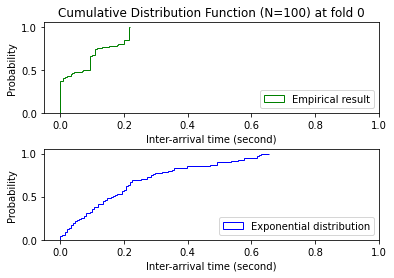

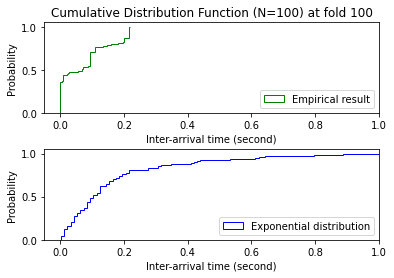

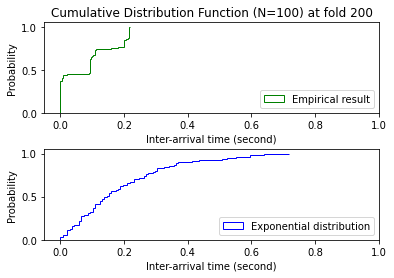

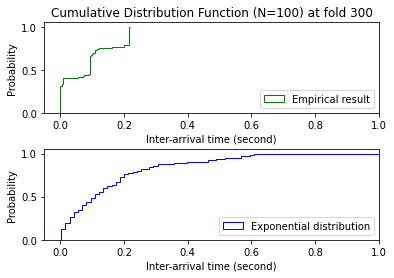

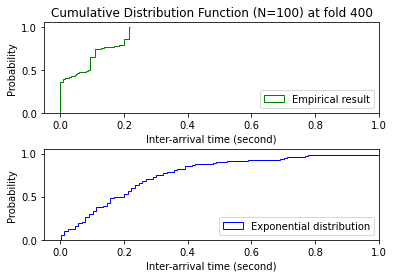

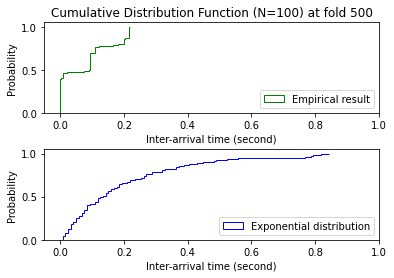

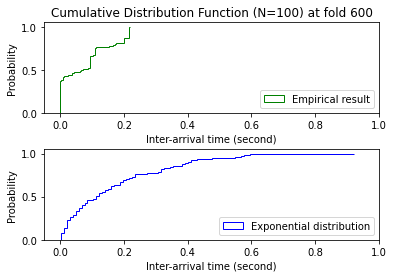

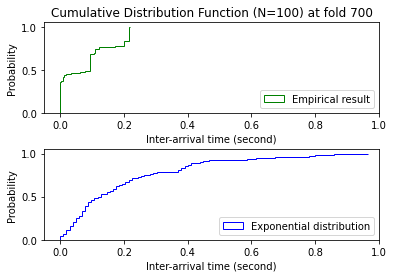

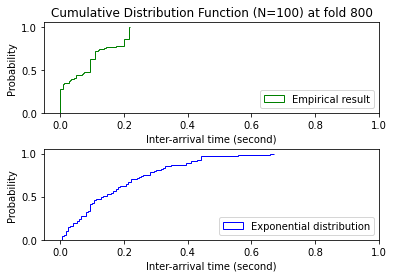

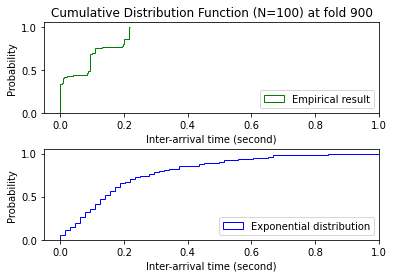

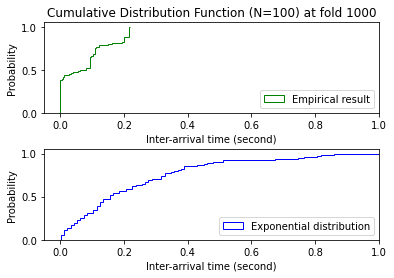

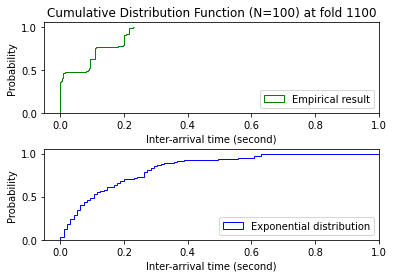

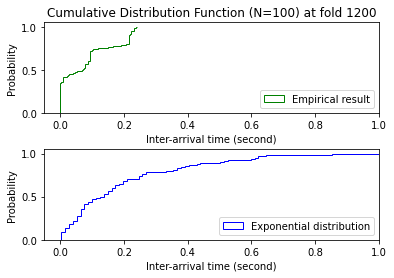

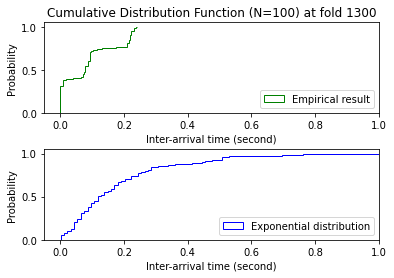

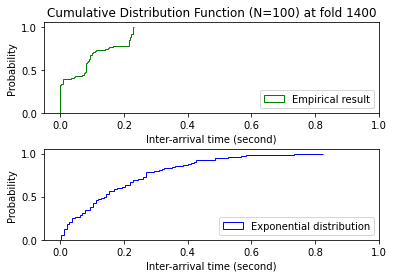

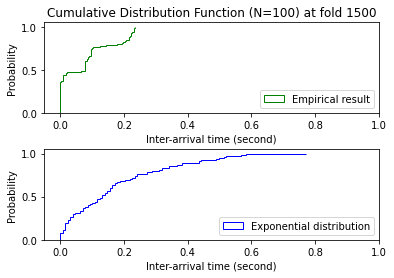

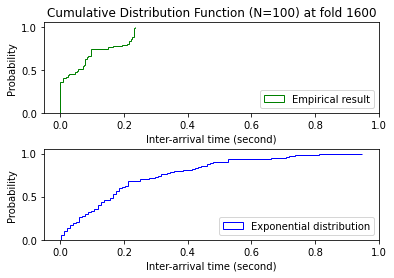

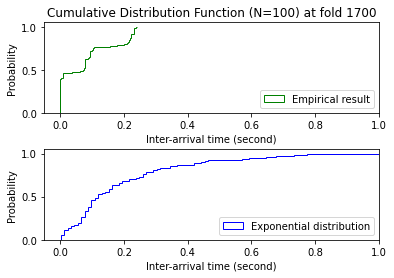

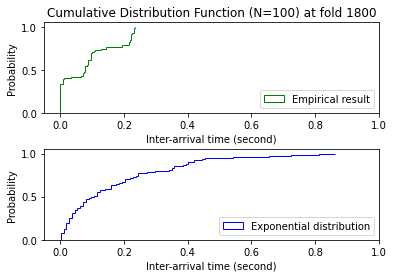

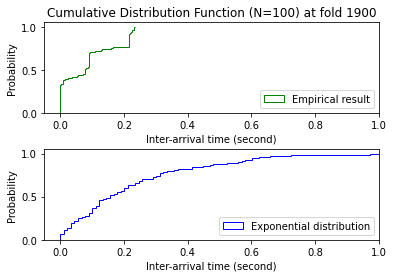

In [11]:

import numpy as np
import matplotlib.pyplot as plt

#fig1, ax = plt.subplots()
for k in range(20):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.subplots_adjust(hspace=0.4)

    #### First, plot the empirical result
    fold = k*100
    y = plc_diff[fold:fold+100]
    n_bins = len(y)-1
    n, bins, patches = ax1.hist(y, n_bins, density=True, histtype='step',
              cumulative=True, label='Empirical result', color='g')
    # the following line is used to remove the last point
    patches[0].set_xy(patches[0].get_xy()[:-1])
    ax1.set_xlim(-0.05, 1.0)
    ax1.set_xlabel('Inter-arrival time (second)')
    ax1.set_ylabel('Probability')
    ax1.set_title('Cumulative Distribution Function (N=100) at fold ' + str(fold))
    ax1.legend(loc=4)

    #### Then plot the theoretical expontential distribution
    G = np.random.default_rng()
    y = G.exponential(scale=0.2, size=len(y))
    # Now, plot the cumulative distributioin function (CDF)
    n_bins = len(y)-1
    n, bins, patches = ax2.hist(y, n_bins, density=True, histtype='step',
              cumulative=True, label='Exponential distribution', color='b')
    # the following line is used to remove the last point
    patches[0].set_xy(patches[0].get_xy()[:-1])
    ax2.set_xlim(-0.05, 1.0)
    ax2.set_xlabel('Inter-arrival time (second)')
    ax2.set_ylabel('Probability')
    #ax2.set_title('Cumulative Distribution Function (N=100)')
    ax2.legend(loc=4)

plt.show()
#plt.savefig('./cdf.pdf')

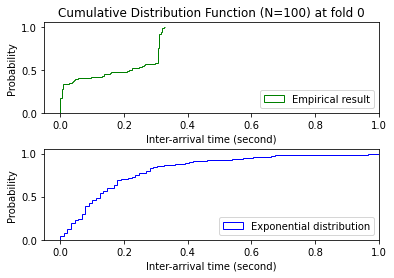

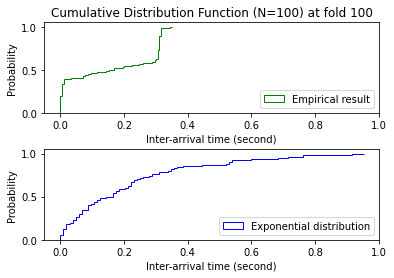

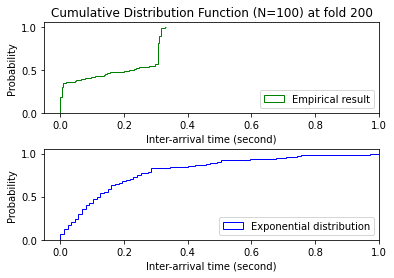

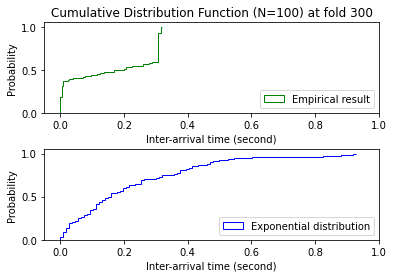

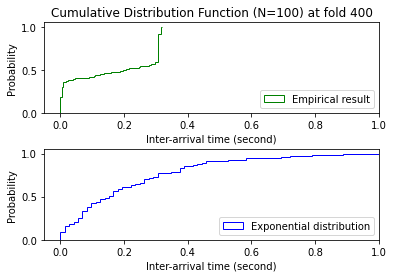

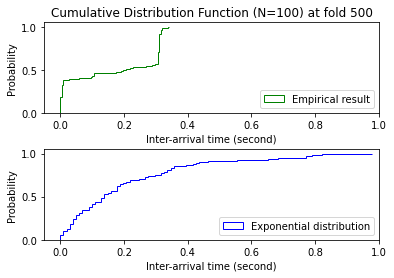

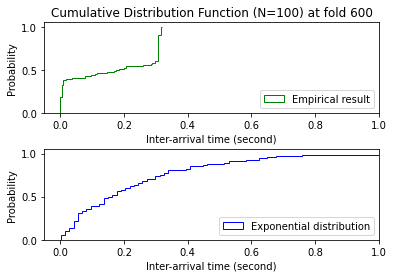

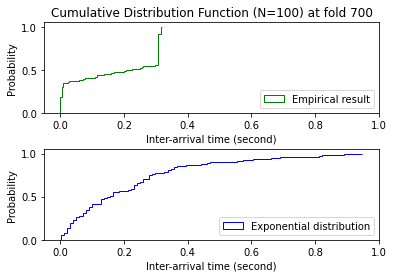

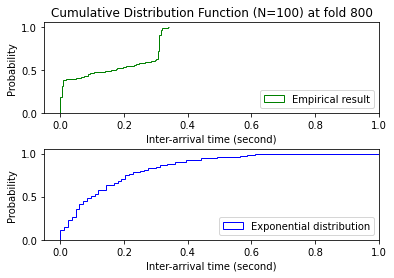

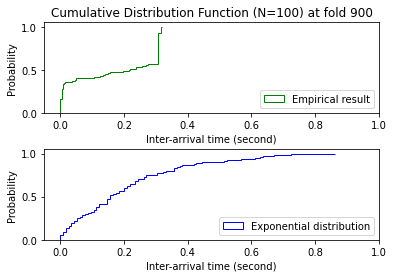

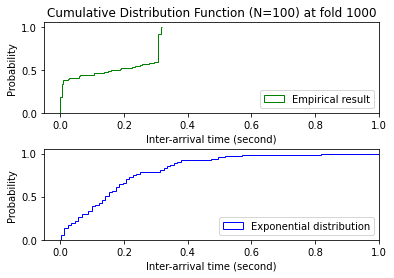

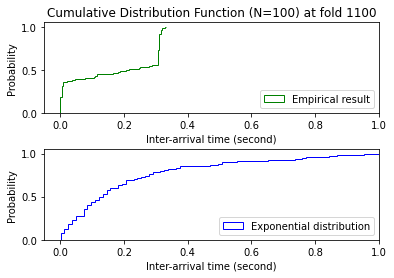

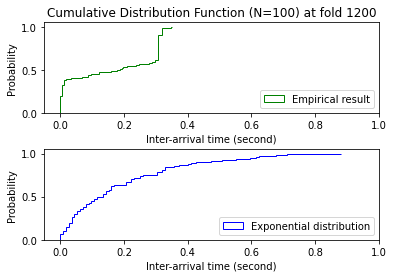

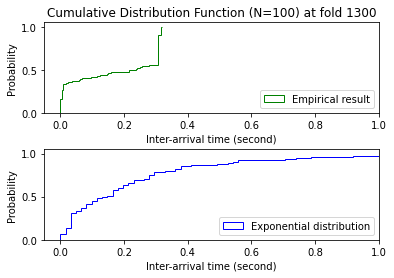

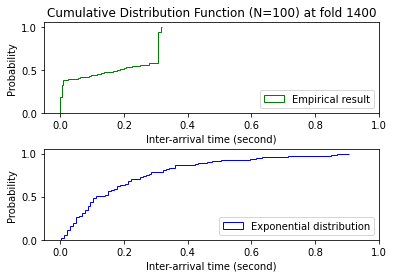

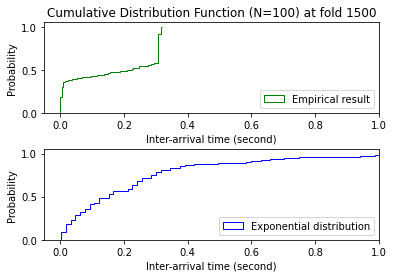

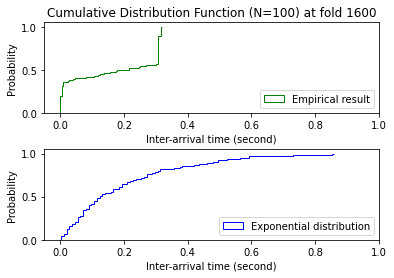

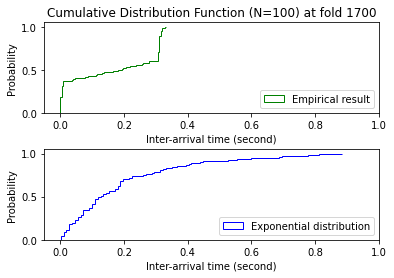

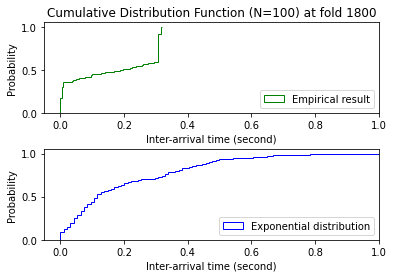

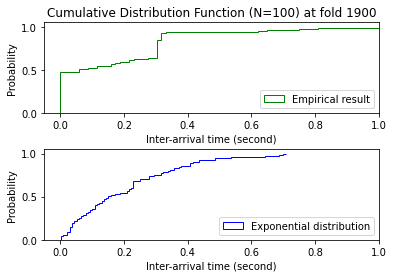

In [12]:

import numpy as np
import matplotlib.pyplot as plt

#fig1, ax = plt.subplots()
for k in range(20):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.subplots_adjust(hspace=0.4)

    #### First, plot the empirical result
    fold = k*100
    y = hmi_diff[fold:fold+100]
    n_bins = len(y)-1
    n, bins, patches = ax1.hist(y, n_bins, density=True, histtype='step',
              cumulative=True, label='Empirical result', color='g')
    # the following line is used to remove the last point
    patches[0].set_xy(patches[0].get_xy()[:-1])
    ax1.set_xlim(-0.05, 1.0)
    ax1.set_xlabel('Inter-arrival time (second)')
    ax1.set_ylabel('Probability')
    ax1.set_title('Cumulative Distribution Function (N=100) at fold ' + str(fold))
    ax1.legend(loc=4)

    #### Then plot the theoretical expontential distribution
    G = np.random.default_rng()
    y = G.exponential(scale=0.2, size=len(y))
    # Now, plot the cumulative distributioin function (CDF)
    n_bins = len(y)-1
    n, bins, patches = ax2.hist(y, n_bins, density=True, histtype='step',
              cumulative=True, label='Exponential distribution', color='b')
    # the following line is used to remove the last point
    patches[0].set_xy(patches[0].get_xy()[:-1])
    ax2.set_xlim(-0.05, 1.0)
    ax2.set_xlabel('Inter-arrival time (second)')
    ax2.set_ylabel('Probability')
    #ax2.set_title('Cumulative Distribution Function (N=100)')
    ax2.legend(loc=4)

plt.show()
#plt.savefig('./cdf.pdf')

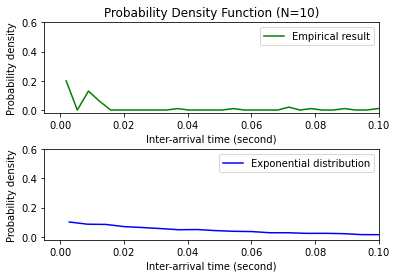

In [13]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.4)

#### First, plot the p.d.f. of our empirical result
y = hmi_diff[100:200]
heights, bins = np.histogram(y, bins=100)
# do normalization
heights = heights/float(sum(heights))
binMids = bins[:-1]+np.diff(bins)/2.
ax1.plot(binMids, heights, label='Empirical result', color='g')
ax1.set_xlim(-0.005, 0.1)
ax1.set_ylim(-0.02, 0.6)
ax1.set_xlabel('Inter-arrival time (second)')
ax1.set_ylabel('Probability density')
ax1.set_title('Probability Density Function (N=10)')
ax1.legend(loc=1)

#### Now, plot the p.d.f. of exponential distribution
G = np.random.default_rng()
y = G.exponential(scale=0.055, size=9010)
heights, bins = np.histogram(y, bins=100)
# do normalization
heights = heights/float(sum(heights))
binMids = bins[:-1]+np.diff(bins)/2.
ax2.plot(binMids, heights, label='Exponential distribution', color='b')
ax2.set_xlim(-0.005, 0.1)
ax2.set_ylim(-0.02, 0.6)
ax2.set_xlabel('Inter-arrival time (second)')
ax2.set_ylabel('Probability density')
ax2.legend(loc=1)

plt.show()


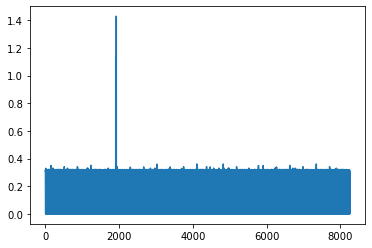

In [14]:
plt.plot(hmi_diff)
plt.show()

In [15]:
freqs = np.fft.fftfreq(len(hmi_diff))

In [16]:
for coef,freq in zip(fourier,freqs):
    if coef:
        print('{c:>6} * exp(2 pi i t * {f})'.format(c=coef,f=freq))

(16512637782180.2-2.765655517578125e-05j) * exp(2 pi i t * 0.0)
(-1693.1887015520701+3081397.104751252j) * exp(2 pi i t * 0.00012112403100775194)
(-297.1412521443349+1539853.7812595568j) * exp(2 pi i t * 0.00024224806201550387)
(-1390.6366145502143+1026573.0626882017j) * exp(2 pi i t * 0.0003633720930232558)
(-613.4365267147818+770316.3246898014j) * exp(2 pi i t * 0.00048449612403100775)
(-992.7310995335447+615728.9166439391j) * exp(2 pi i t * 0.0006056201550387597)
(-1006.3256441926997+513555.50696854474j) * exp(2 pi i t * 0.0007267441860465116)
(-708.3671607159004+439886.53706260346j) * exp(2 pi i t * 0.0008478682170542636)
(-1106.3138198986626+385026.58775873843j) * exp(2 pi i t * 0.0009689922480620155)
(-731.566435429434+342307.1253660898j) * exp(2 pi i t * 0.0010901162790697674)
(-965.0304082838047+307891.665266161j) * exp(2 pi i t * 0.0012112403100775194)
(-915.5381638376311+280169.48611120007j) * exp(2 pi i t * 0.0013323643410852713)
(-1473.4492144152227+256937.1415296216j) * ex

(-918.6428146875596+12458.343932032494j) * exp(2 pi i t * 0.02991763565891473)
(-880.4169908304593+12399.691347498667j) * exp(2 pi i t * 0.03003875968992248)
(-917.6636863182312+12336.76718836639j) * exp(2 pi i t * 0.03015988372093023)
(-893.2298928002474+12319.730857872184j) * exp(2 pi i t * 0.030281007751937983)
(-899.2209200782763+12229.825844498739j) * exp(2 pi i t * 0.030402131782945735)
(-903.2113691248683+12193.737075689416j) * exp(2 pi i t * 0.030523255813953487)
(-882.392986566556+12145.927265214717j) * exp(2 pi i t * 0.03064437984496124)
(-917.5464131510123+12097.926464347998j) * exp(2 pi i t * 0.03076550387596899)
(-887.4187896781266+12069.737532627089j) * exp(2 pi i t * 0.030886627906976744)
(-903.719005441716+11990.571338169142j) * exp(2 pi i t * 0.031007751937984496)
(-907.5466372848587+11980.336112834184j) * exp(2 pi i t * 0.031128875968992248)
(-884.1329141904207+11903.86611348484j) * exp(2 pi i t * 0.03125)
(-919.4434292677188+11871.469150389148j) * exp(2 pi i t * 0.03

(-905.4571497440011+8327.500907116655j) * exp(2 pi i t * 0.04457364341085271)
(-899.17558004087+8328.076111628247j) * exp(2 pi i t * 0.04469476744186046)
(-891.8119654940633+8282.873274906053j) * exp(2 pi i t * 0.04481589147286821)
(-909.6538464118103+8275.670512022974j) * exp(2 pi i t * 0.044937015503875966)
(-896.8442952988757+8248.195131332965j) * exp(2 pi i t * 0.04505813953488372)
(-908.4718828034988+8219.112345373704j) * exp(2 pi i t * 0.04517926356589147)
(-896.2657974323151+8213.90050738492j) * exp(2 pi i t * 0.04530038759689922)
(-896.908457389083+8171.0041753198375j) * exp(2 pi i t * 0.045421511627906974)
(-907.4563326348693+8167.013675178574j) * exp(2 pi i t * 0.045542635658914726)
(-889.3907036726432+8134.879126753395j) * exp(2 pi i t * 0.04566375968992248)
(-911.9297302371797+8112.667183096768j) * exp(2 pi i t * 0.04578488372093023)
(-892.2595572030468+8103.01092267224j) * exp(2 pi i t * 0.04590600775193798)
(-901.2985788097095+8061.4766099261315j) * exp(2 pi i t * 0.04602

(-901.0118231501215+4576.939392429849j) * exp(2 pi i t * 0.08054748062015504)
(-896.3708433213385+4566.867198901906j) * exp(2 pi i t * 0.0806686046511628)
(-901.6916288213065+4558.15234080059j) * exp(2 pi i t * 0.08078972868217055)
(-896.8661162471692+4554.877751940289j) * exp(2 pi i t * 0.0809108527131783)
(-898.6790056625282+4543.024715807843j) * exp(2 pi i t * 0.08103197674418605)
(-898.4173734476808+4539.847571560741j) * exp(2 pi i t * 0.0811531007751938)
(-896.2827903021268+4530.513518210236j) * exp(2 pi i t * 0.08127422480620156)
(-910.1086079202692+4528.319700986235j) * exp(2 pi i t * 0.08139534883720931)
(-895.392643676006+4520.920422599246j) * exp(2 pi i t * 0.08151647286821705)
(-903.4971193853212+4508.205726262825j) * exp(2 pi i t * 0.0816375968992248)
(-899.6445774761949+4509.3359902252905j) * exp(2 pi i t * 0.08175872093023255)
(-897.3362226356041+4494.3078646112845j) * exp(2 pi i t * 0.0818798449612403)
(-903.4892202850235+4493.750699952184j) * exp(2 pi i t * 0.0820009689

(-900.7424465102986+2822.751231120378j) * exp(2 pi i t * 0.1280281007751938)
(-899.2453260267255+2818.8789676446722j) * exp(2 pi i t * 0.12814922480620156)
(-902.9174635445644+2816.1285296171322j) * exp(2 pi i t * 0.1282703488372093)
(-899.216634208509+2815.447491964472j) * exp(2 pi i t * 0.12839147286821706)
(-898.5939520662212+2801.417301969507j) * exp(2 pi i t * 0.1285125968992248)
(-895.3359494232409+2801.168972570434j) * exp(2 pi i t * 0.12863372093023256)
(-906.0227750492302+2805.923825520077j) * exp(2 pi i t * 0.12875484496124032)
(-897.1555616119724+2803.2675679047475j) * exp(2 pi i t * 0.12887596899224807)
(-902.6321056664412+2798.816782821463j) * exp(2 pi i t * 0.12899709302325582)
(-899.4392234057669+2800.952528860643j) * exp(2 pi i t * 0.12911821705426357)
(-901.5684583590353+2793.0739746849385j) * exp(2 pi i t * 0.12923934108527133)
(-900.5003037237502+2785.8327567810343j) * exp(2 pi i t * 0.12936046511627908)
(-903.3249935559422+2789.3733851062325j) * exp(2 pi i t * 0.129

(-881.4989467912857+2288.68941679178j) * exp(2 pi i t * 0.1560077519379845)
(-911.2249820489449+2232.228247187891j) * exp(2 pi i t * 0.15612887596899225)
(-890.0685100591935+2253.3861783867187j) * exp(2 pi i t * 0.15625)
(-899.9490318583828+2265.1033632546755j) * exp(2 pi i t * 0.15637112403100775)
(-901.0766140638494+2267.937857454447j) * exp(2 pi i t * 0.1564922480620155)
(-892.5265858644277+2261.3658363960285j) * exp(2 pi i t * 0.15661337209302326)
(-905.2930795630707+2258.3577211830243j) * exp(2 pi i t * 0.156734496124031)
(-901.4665864226497+2266.425897086934j) * exp(2 pi i t * 0.15685562015503876)
(-893.6835617296838+2252.1911832210235j) * exp(2 pi i t * 0.1569767441860465)
(-903.2303054782795+2261.725962036474j) * exp(2 pi i t * 0.15709786821705427)
(-887.8382755925164+2253.9165475774475j) * exp(2 pi i t * 0.15721899224806202)
(-905.3633946615663+2246.4760976407974j) * exp(2 pi i t * 0.15734011627906977)
(-902.0074598657476+2257.8314887321594j) * exp(2 pi i t * 0.157461240310077

(-898.4681178711237+1815.0217064849105j) * exp(2 pi i t * 0.19064922480620156)
(-899.0955375087142+1812.46332553845j) * exp(2 pi i t * 0.1907703488372093)
(-898.9266217459805+1811.823750826164j) * exp(2 pi i t * 0.19089147286821706)
(-898.3138363342125+1820.2168085578664j) * exp(2 pi i t * 0.1910125968992248)
(-900.943327948375+1815.9446680926246j) * exp(2 pi i t * 0.19113372093023256)
(-894.8186785437252+1809.3896818811888j) * exp(2 pi i t * 0.19125484496124032)
(-902.7730872393543+1808.1714303516776j) * exp(2 pi i t * 0.19137596899224807)
(-897.8209578656965+1809.452902340829j) * exp(2 pi i t * 0.19149709302325582)
(-899.1365071458298+1806.784101972291j) * exp(2 pi i t * 0.19161821705426357)
(-898.3567062032328+1807.4168556588409j) * exp(2 pi i t * 0.19173934108527133)
(-898.7956817933712+1803.4470341584001j) * exp(2 pi i t * 0.19186046511627908)
(-899.6487843536383+1802.3453824231506j) * exp(2 pi i t * 0.19198158914728683)
(-896.2176026411963+1799.3695831348691j) * exp(2 pi i t * 0.

(-897.3186790162017+1301.2517296967794j) * exp(2 pi i t * 0.251453488372093)
(-900.1841416579987+1292.6914831287963j) * exp(2 pi i t * 0.25157461240310075)
(-901.9952237269117+1300.1856695750942j) * exp(2 pi i t * 0.25169573643410853)
(-896.6634886054566+1293.6933697628965j) * exp(2 pi i t * 0.25181686046511625)
(-903.1229568969768+1298.7874917318318j) * exp(2 pi i t * 0.25193798449612403)
(-895.35022946172+1292.2365513585983j) * exp(2 pi i t * 0.25205910852713176)
(-901.0698609950314+1286.8422616629553j) * exp(2 pi i t * 0.25218023255813954)
(-900.8661894158936+1294.8777823810374j) * exp(2 pi i t * 0.25230135658914726)
(-896.5672862782092+1286.754811883212j) * exp(2 pi i t * 0.25242248062015504)
(-903.6626716618318+1290.8132790436243j) * exp(2 pi i t * 0.25254360465116277)
(-895.7867026426454+1289.97103243448j) * exp(2 pi i t * 0.25266472868217055)
(-902.3855189816895+1285.5614834207754j) * exp(2 pi i t * 0.25278585271317827)
(-899.1832971930063+1291.5532988108612j) * exp(2 pi i t * 0

(-902.2369254109299+1147.2916392538764j) * exp(2 pi i t * 0.2761627906976744)
(-894.6960818285507+1144.7906428690135j) * exp(2 pi i t * 0.2762839147286822)
(-901.5824543258126+1142.639883893593j) * exp(2 pi i t * 0.2764050387596899)
(-896.4758733189132+1148.0164406560343j) * exp(2 pi i t * 0.2765261627906977)
(-895.3655711702288+1141.193484407866j) * exp(2 pi i t * 0.2766472868217054)
(-903.3620079045095+1142.8346007407301j) * exp(2 pi i t * 0.2767684108527132)
(-896.3517388428338+1139.6163003954284j) * exp(2 pi i t * 0.2768895348837209)
(-903.986715322688+1139.4078021561222j) * exp(2 pi i t * 0.2770106589147287)
(-896.8141718161494+1142.3367102537081j) * exp(2 pi i t * 0.2771317829457364)
(-899.6372319340835+1134.7631722368053j) * exp(2 pi i t * 0.2772529069767442)
(-901.3282677695344+1141.095380295563j) * exp(2 pi i t * 0.27737403100775193)
(-898.5843453133127+1138.0319646668843j) * exp(2 pi i t * 0.2774951550387597)
(-903.6535878606968+1137.4151719718216j) * exp(2 pi i t * 0.2776162

(-898.7687694832648+983.8896782667366j) * exp(2 pi i t * 0.3072916666666667)
(-900.8717291224789+983.7628616634761j) * exp(2 pi i t * 0.3074127906976744)
(-898.2349032129848+982.6124020911777j) * exp(2 pi i t * 0.3075339147286822)
(-900.5531776130258+980.4683746717361j) * exp(2 pi i t * 0.3076550387596899)
(-899.4952667159167+982.410953445455j) * exp(2 pi i t * 0.3077761627906977)
(-899.1119209312902+978.7582874656907j) * exp(2 pi i t * 0.3078972868217054)
(-899.5033510918404+980.3966862226907j) * exp(2 pi i t * 0.3080184108527132)
(-897.7655080644257+978.4600987189774j) * exp(2 pi i t * 0.3081395348837209)
(-900.9943028801865+977.5001342233272j) * exp(2 pi i t * 0.3082606589147287)
(-898.2496290776559+978.8699550595443j) * exp(2 pi i t * 0.3083817829457364)
(-898.8892402791812+974.2870012747003j) * exp(2 pi i t * 0.3085029069767442)
(-897.8339015711166+975.7268610567768j) * exp(2 pi i t * 0.30862403100775193)
(-899.2796932998505+976.0276254715646j) * exp(2 pi i t * 0.3087451550387597)

(-894.4969980579012+884.6545275326583j) * exp(2 pi i t * 0.32897286821705424)
(-901.387104939107+884.1831447872829j) * exp(2 pi i t * 0.329093992248062)
(-899.7029213691337+885.6252106547047j) * exp(2 pi i t * 0.32921511627906974)
(-898.6231238145987+883.4807475230474j) * exp(2 pi i t * 0.3293362403100775)
(-900.8220820142365+883.6486488850526j) * exp(2 pi i t * 0.32945736434108525)
(-898.4603662953497+883.4446281796274j) * exp(2 pi i t * 0.329578488372093)
(-899.5359312360517+881.1379196884515j) * exp(2 pi i t * 0.32969961240310075)
(-899.2445622542712+883.3529204376986j) * exp(2 pi i t * 0.32982073643410853)
(-898.7304704728966+880.8483518649326j) * exp(2 pi i t * 0.32994186046511625)
(-900.3935461319863+881.2289366737261j) * exp(2 pi i t * 0.33006298449612403)
(-898.0459572738654+881.333323486288j) * exp(2 pi i t * 0.33018410852713176)
(-897.8819488384587+879.528765904869j) * exp(2 pi i t * 0.33030523255813954)
(-895.7633776404573+882.8618347713863j) * exp(2 pi i t * 0.3304263565891

(-900.1223490764744+732.5469141404456j) * exp(2 pi i t * 0.36773255813953487)
(-898.7969050018286+733.7398508130836j) * exp(2 pi i t * 0.36785368217054265)
(-898.4965376294509+731.7907535875341j) * exp(2 pi i t * 0.3679748062015504)
(-900.0007607217103+733.7223963679662j) * exp(2 pi i t * 0.36809593023255816)
(-898.6560126961585+733.0934122524782j) * exp(2 pi i t * 0.3682170542635659)
(-900.3292935703579+729.6636391060518j) * exp(2 pi i t * 0.36833817829457366)
(-899.5183313347692+732.342063361279j) * exp(2 pi i t * 0.3684593023255814)
(-898.6077978739434+729.4956317463829j) * exp(2 pi i t * 0.36858042635658916)
(-900.4961205450752+730.3561024944996j) * exp(2 pi i t * 0.3687015503875969)
(-898.445485770642+729.5327964274197j) * exp(2 pi i t * 0.36882267441860467)
(-900.4500094077674+728.4522636301448j) * exp(2 pi i t * 0.3689437984496124)
(-898.3664760410142+729.6881695056521j) * exp(2 pi i t * 0.3690649224806202)
(-898.9152032598024+727.1747215574526j) * exp(2 pi i t * 0.3691860465116

(-899.7705946600714+658.622961648925j) * exp(2 pi i t * 0.3892926356589147)
(-899.3301386685907+657.738192929798j) * exp(2 pi i t * 0.3894137596899225)
(-899.3419459846998+658.0013064495662j) * exp(2 pi i t * 0.3895348837209302)
(-899.445530363762+657.8566910278437j) * exp(2 pi i t * 0.389656007751938)
(-899.8627005841187+657.541582577034j) * exp(2 pi i t * 0.3897771317829457)
(-899.6149916519175+656.1755167885839j) * exp(2 pi i t * 0.3898982558139535)
(-899.6330835514016+656.1377752913688j) * exp(2 pi i t * 0.3900193798449612)
(-899.7889117080556+655.5886162339214j) * exp(2 pi i t * 0.390140503875969)
(-899.5686888401559+655.5729519615367j) * exp(2 pi i t * 0.3902616279069767)
(-899.2881667420166+654.7883755070774j) * exp(2 pi i t * 0.3903827519379845)
(-901.0047159893369+654.6711940582625j) * exp(2 pi i t * 0.3905038759689922)
(-900.3389821773196+654.8492434560802j) * exp(2 pi i t * 0.390625)
(-898.6640418893744+654.9846068927601j) * exp(2 pi i t * 0.3907461240310077)
(-897.880838431

(-898.8778988526935+545.1510967162826j) * exp(2 pi i t * 0.4251453488372093)
(-899.5642137268401+547.0845200800267j) * exp(2 pi i t * 0.42526647286821706)
(-898.9574288322432+545.5531177655348j) * exp(2 pi i t * 0.4253875968992248)
(-899.2231468723799+547.0018633595088j) * exp(2 pi i t * 0.42550872093023256)
(-898.2789181640087+546.2065799390834j) * exp(2 pi i t * 0.4256298449612403)
(-900.3016378807228+543.2198521120538j) * exp(2 pi i t * 0.42575096899224807)
(-898.1891004960161+544.7919748380193j) * exp(2 pi i t * 0.4258720930232558)
(-898.8780188669131+541.5214904378763j) * exp(2 pi i t * 0.4259932170542636)
(-899.5352516994191+544.96577690576j) * exp(2 pi i t * 0.4261143410852713)
(-896.2212439381498+542.1395389425405j) * exp(2 pi i t * 0.4262354651162791)
(-902.6176287294622+543.0338082517961j) * exp(2 pi i t * 0.4263565891472868)
(-900.3560946347683+543.1148226026944j) * exp(2 pi i t * 0.4264777131782946)
(-899.2256405175525+541.6356111283583j) * exp(2 pi i t * 0.4265988372093023

(-900.21374238925+496.0987015627466j) * exp(2 pi i t * 0.4437984496124031)
(-898.1234074952204+495.8095415785674j) * exp(2 pi i t * 0.44391957364341084)
(-897.8228818288536+490.40383112994255j) * exp(2 pi i t * 0.4440406976744186)
(-897.8241180102751+493.64901838446906j) * exp(2 pi i t * 0.44416182170542634)
(-897.3548820407154+490.94205762454845j) * exp(2 pi i t * 0.4442829457364341)
(-900.7517350424922+493.07710180847226j) * exp(2 pi i t * 0.44440406976744184)
(-898.9696066813356+490.11886352394333j) * exp(2 pi i t * 0.4445251937984496)
(-898.3139245566655+489.82556713249073j) * exp(2 pi i t * 0.44464631782945735)
(-896.5770498744744+490.01312846928j) * exp(2 pi i t * 0.44476744186046513)
(-899.7667162939161+486.3831747872557j) * exp(2 pi i t * 0.44488856589147285)
(-896.2236927620909+490.34808058750025j) * exp(2 pi i t * 0.44500968992248063)
(-893.9378002139281+481.02769944196956j) * exp(2 pi i t * 0.44513081395348836)
(-900.1017504289679+497.2225859432266j) * exp(2 pi i t * 0.44525

(-898.8986966684411+452.9303006503982j) * exp(2 pi i t * 0.4586967054263566)
(-898.9528475081898+449.9861026596428j) * exp(2 pi i t * 0.4588178294573643)
(-898.5678393912839+451.8219877334383j) * exp(2 pi i t * 0.4589389534883721)
(-895.9895692456475+452.1772845898857j) * exp(2 pi i t * 0.4590600775193798)
(-900.6476257222674+450.2546271176253j) * exp(2 pi i t * 0.4591812015503876)
(-895.9709694855512+450.71095318986886j) * exp(2 pi i t * 0.45930232558139533)
(-897.0597746820238+447.7904091660132j) * exp(2 pi i t * 0.4594234496124031)
(-895.7970240519428+453.5595076975865j) * exp(2 pi i t * 0.45954457364341084)
(-891.976673334186+449.63332980004225j) * exp(2 pi i t * 0.4596656976744186)
(-914.5436016012032+447.5405411168322j) * exp(2 pi i t * 0.45978682170542634)
(-904.0990302637895+446.2413890582992j) * exp(2 pi i t * 0.4599079457364341)
(-900.7612815883388+449.5535807250462j) * exp(2 pi i t * 0.46002906976744184)
(-901.8075315551647+447.86429484760777j) * exp(2 pi i t * 0.46015019379

(-900.3439568974344+384.1619138850558j) * exp(2 pi i t * 0.4837693798449612)
(-899.3154063004952+384.33193596589365j) * exp(2 pi i t * 0.483890503875969)
(-900.7620339233895+383.07795953000823j) * exp(2 pi i t * 0.4840116279069767)
(-900.5331719147171+383.52582969173056j) * exp(2 pi i t * 0.4841327519379845)
(-900.4531629228994+381.8529125260012j) * exp(2 pi i t * 0.4842538759689922)
(-901.8790713672686+382.4188257079569j) * exp(2 pi i t * 0.484375)
(-896.1559790776967+383.30979840798886j) * exp(2 pi i t * 0.4844961240310077)
(-898.7750682783856+382.7076549779398j) * exp(2 pi i t * 0.4846172480620155)
(-899.2967258402505+381.7624269419964j) * exp(2 pi i t * 0.48473837209302323)
(-899.4230701332501+381.91928475623826j) * exp(2 pi i t * 0.484859496124031)
(-899.6811450485468+381.518440531408j) * exp(2 pi i t * 0.48498062015503873)
(-899.8933595556824+382.40730847323044j) * exp(2 pi i t * 0.4851017441860465)
(-899.7641134158828+380.7522277058687j) * exp(2 pi i t * 0.48522286821705424)
(-8

(-897.434921647971+332.35163787370345j) * exp(2 pi i t * -0.4960029069767442)
(-901.2932739012422+333.4247532557517j) * exp(2 pi i t * -0.4958817829457364)
(-897.6108365461204+336.15988941297815j) * exp(2 pi i t * -0.4957606589147287)
(-900.1961838200184+332.0380259077941j) * exp(2 pi i t * -0.4956395348837209)
(-899.343138166258+333.9031828416365j) * exp(2 pi i t * -0.4955184108527132)
(-900.324905674445+332.63515313563005j) * exp(2 pi i t * -0.4953972868217054)
(-900.7080223191953+331.85987056268596j) * exp(2 pi i t * -0.4952761627906977)
(-897.5516689890372+331.05196328625044j) * exp(2 pi i t * -0.4951550387596899)
(-899.4455303358475+330.4334032997773j) * exp(2 pi i t * -0.4950339147286822)
(-899.6322171491886+332.44438239295044j) * exp(2 pi i t * -0.4949127906976744)
(-899.6693511152607+329.6088660888083j) * exp(2 pi i t * -0.4947916666666667)
(-900.5738350347395+331.1684586612016j) * exp(2 pi i t * -0.4946705426356589)
(-897.5758737370016+333.57693823174594j) * exp(2 pi i t * -0.

(-899.3359437300765+287.1692190513135j) * exp(2 pi i t * -0.47638081395348836)
(-898.2487436436526+285.46999470058296j) * exp(2 pi i t * -0.47625968992248063)
(-900.3561700965079+285.219050129626j) * exp(2 pi i t * -0.47613856589147285)
(-898.9245008983183+286.3304529870218j) * exp(2 pi i t * -0.47601744186046513)
(-899.4829477074503+283.6990463853547j) * exp(2 pi i t * -0.47589631782945735)
(-900.3808389264191+286.1751410504449j) * exp(2 pi i t * -0.4757751937984496)
(-898.2372491846315+284.89277603931464j) * exp(2 pi i t * -0.47565406976744184)
(-901.4798189764653+284.4206356253964j) * exp(2 pi i t * -0.4755329457364341)
(-898.7932098731433+285.1030905429089j) * exp(2 pi i t * -0.47541182170542634)
(-900.2623298676318+282.5235381944273j) * exp(2 pi i t * -0.4752906976744186)
(-900.3470427439761+285.789195256186j) * exp(2 pi i t * -0.47516957364341084)
(-900.4988762623967+284.07461558139494j) * exp(2 pi i t * -0.4750484496124031)
(-900.3060518341192+283.93787783430605j) * exp(2 pi i t

(-900.6593567654759+233.85725640697495j) * exp(2 pi i t * -0.45348837209302323)
(-899.7527467911693+233.10559231235516j) * exp(2 pi i t * -0.4533672480620155)
(-895.973205052687+230.53838092503548j) * exp(2 pi i t * -0.4532461240310077)
(-904.0483524709433+230.23788414804926j) * exp(2 pi i t * -0.453125)
(-900.522236751583+232.41126959358334j) * exp(2 pi i t * -0.4530038759689922)
(-901.2987376304096+228.3477955433741j) * exp(2 pi i t * -0.4528827519379845)
(-900.5108221735225+228.25443908737958j) * exp(2 pi i t * -0.4527616279069767)
(-899.5738749096336+230.5807654449307j) * exp(2 pi i t * -0.452640503875969)
(-900.207043230529+225.6106622792247j) * exp(2 pi i t * -0.4525193798449612)
(-898.9901043994817+229.76054645425063j) * exp(2 pi i t * -0.4523982558139535)
(-901.3216912808084+228.71248644186642j) * exp(2 pi i t * -0.4522771317829457)
(-900.4057775312563+229.91002529260197j) * exp(2 pi i t * -0.452156007751938)
(-895.9474992766635+223.14794899240965j) * exp(2 pi i t * -0.45203488

(-900.1838008371601+166.0785086221906j) * exp(2 pi i t * -0.42453972868217055)
(-898.3304424828407+165.95836505017917j) * exp(2 pi i t * -0.42441860465116277)
(-899.5601029639952+165.12478310103037j) * exp(2 pi i t * -0.42429748062015504)
(-898.5140254430142+165.43552129610583j) * exp(2 pi i t * -0.42417635658914726)
(-898.3114348013781+164.789107806949j) * exp(2 pi i t * -0.42405523255813954)
(-899.8209999869614+165.05866632943008j) * exp(2 pi i t * -0.42393410852713176)
(-898.7952976917686+164.95255143035206j) * exp(2 pi i t * -0.42381298449612403)
(-900.2878498112727+165.0335399183905j) * exp(2 pi i t * -0.42369186046511625)
(-898.8640252900636+164.5828305450038j) * exp(2 pi i t * -0.42357073643410853)
(-899.7601159032006+162.5830006318372j) * exp(2 pi i t * -0.42344961240310075)
(-898.0323591585698+163.55093822053652j) * exp(2 pi i t * -0.423328488372093)
(-898.3161522326202+163.68289293530938j) * exp(2 pi i t * -0.42320736434108525)
(-899.9253989998992+163.24490776757108j) * exp(2

(-900.331903750774+131.36161543685552j) * exp(2 pi i t * -0.40830910852713176)
(-899.0494500906166+129.04899220454695j) * exp(2 pi i t * -0.40818798449612403)
(-900.2442483303766+129.80392673378293j) * exp(2 pi i t * -0.40806686046511625)
(-898.1852850850266+130.58652411221152j) * exp(2 pi i t * -0.40794573643410853)
(-900.1131626202839+128.13406112330915j) * exp(2 pi i t * -0.40782461240310075)
(-899.9080986978015+130.7208969202773j) * exp(2 pi i t * -0.407703488372093)
(-899.6852234535068+128.8087120057308j) * exp(2 pi i t * -0.40758236434108525)
(-900.7568249236302+129.25125350201705j) * exp(2 pi i t * -0.4074612403100775)
(-898.5642185907652+126.57748428203627j) * exp(2 pi i t * -0.40734011627906974)
(-900.6997687466967+126.29119100531561j) * exp(2 pi i t * -0.407218992248062)
(-899.7851684991384+128.2037922525077j) * exp(2 pi i t * -0.40709786821705424)
(-898.6087700522129+125.60979114111262j) * exp(2 pi i t * -0.4069767441860465)
(-900.9264989065342+128.07052483182144j) * exp(2 p

(-899.6979607617957+95.91040778968801j) * exp(2 pi i t * -0.39304748062015504)
(-899.6729510197899+98.83089242059339j) * exp(2 pi i t * -0.39292635658914726)
(-901.5906246032343+96.23711674459997j) * exp(2 pi i t * -0.39280523255813954)
(-899.6510011703925+97.65312152852434j) * exp(2 pi i t * -0.39268410852713176)
(-898.5406238840392+95.92500611472833j) * exp(2 pi i t * -0.39256298449612403)
(-900.7885731856865+94.86304553094563j) * exp(2 pi i t * -0.39244186046511625)
(-898.9142567047013+96.16164487340063j) * exp(2 pi i t * -0.39232073643410853)
(-899.5464316755022+94.58201621272804j) * exp(2 pi i t * -0.39219961240310075)
(-900.9016016598468+95.97634278256987j) * exp(2 pi i t * -0.392078488372093)
(-898.2359507936721+93.45969927041392j) * exp(2 pi i t * -0.39195736434108525)
(-900.4838933634721+94.28380722584794j) * exp(2 pi i t * -0.3918362403100775)
(-898.9754835576712+95.12197071289165j) * exp(2 pi i t * -0.39171511627906974)
(-899.1106895438808+92.2018276308978j) * exp(2 pi i t *

(-898.8094482157421+55.46250878856398j) * exp(2 pi i t * -0.374031007751938)
(-900.2970625176456+54.6078634347312j) * exp(2 pi i t * -0.3739098837209302)
(-899.3955801819131+56.74774853238125j) * exp(2 pi i t * -0.3737887596899225)
(-898.6493891480466+53.957693886067034j) * exp(2 pi i t * -0.3736676356589147)
(-900.8447821945598+54.946490890459245j) * exp(2 pi i t * -0.373546511627907)
(-898.5134579181417+54.582424782064095j) * exp(2 pi i t * -0.3734253875968992)
(-900.4675791599134+53.24280043216061j) * exp(2 pi i t * -0.37330426356589147)
(-899.3064536181913+54.65053215041462j) * exp(2 pi i t * -0.3731831395348837)
(-899.3521213814145+52.54348086617529j) * exp(2 pi i t * -0.37306201550387597)
(-899.9805057945068+53.42155800968152j) * exp(2 pi i t * -0.3729408914728682)
(-898.3576242903721+52.622497803835515j) * exp(2 pi i t * -0.37281976744186046)
(-899.8233185945851+52.04516308769308j) * exp(2 pi i t * -0.3726986434108527)
(-898.7402418617352+52.42467465291435j) * exp(2 pi i t * -0.

(-900.0477001118162+24.019781429032278j) * exp(2 pi i t * -0.35973837209302323)
(-899.4989855978793+24.059860357254948j) * exp(2 pi i t * -0.3596172480620155)
(-899.0978032251929+23.234380176525185j) * exp(2 pi i t * -0.3594961240310077)
(-899.5221393155153+23.920297248924776j) * exp(2 pi i t * -0.359375)
(-898.2994450924755+22.756814086370838j) * exp(2 pi i t * -0.3592538759689922)
(-900.0778589030808+22.595464668412944j) * exp(2 pi i t * -0.3591327519379845)
(-898.7369822041219+23.417938956342084j) * exp(2 pi i t * -0.3590116279069767)
(-899.6658974592767+22.160163948532073j) * exp(2 pi i t * -0.358890503875969)
(-899.4489761618547+22.583866488505464j) * exp(2 pi i t * -0.3587693798449612)
(-899.0629125003743+21.278022616541023j) * exp(2 pi i t * -0.3586482558139535)
(-899.5487031589838+21.308401967313443j) * exp(2 pi i t * -0.3585271317829457)
(-899.1785134957483+21.39331720725221j) * exp(2 pi i t * -0.358406007751938)
(-899.9042291596718+20.43945934305077j) * exp(2 pi i t * -0.3582

(-899.0945978966911-9.676211300344733j) * exp(2 pi i t * -0.3439922480620155)
(-899.5770252813284-10.006176675413997j) * exp(2 pi i t * -0.3438711240310077)
(-899.5643700084556-9.633175056934249j) * exp(2 pi i t * -0.34375)
(-900.1637583134035-10.248622847349708j) * exp(2 pi i t * -0.3436288759689922)
(-900.3381907005341-9.538706793566234j) * exp(2 pi i t * -0.3435077519379845)
(-898.115208216724-11.509136317526298j) * exp(2 pi i t * -0.3433866279069767)
(-900.0588256233842-12.669597752369896j) * exp(2 pi i t * -0.343265503875969)
(-898.7426550178812-11.332806294645167j) * exp(2 pi i t * -0.3431443798449612)
(-899.6741282276773-12.98274016727018j) * exp(2 pi i t * -0.3430232558139535)
(-900.5349481255098-12.082452259814588j) * exp(2 pi i t * -0.3429021317829457)
(-898.6619102254406-12.999963810353094j) * exp(2 pi i t * -0.342781007751938)
(-900.6075847767715-13.250636389915016j) * exp(2 pi i t * -0.3426598837209302)
(-898.8810852103305-11.989437276763056j) * exp(2 pi i t * -0.342538759

(-898.4395687123204-42.62592551897518j) * exp(2 pi i t * -0.32921511627906974)
(-899.7796735914859-41.08213840221123j) * exp(2 pi i t * -0.329093992248062)
(-897.8864126126791-42.53380038601222j) * exp(2 pi i t * -0.32897286821705424)
(-900.5171435737946-43.390972699759004j) * exp(2 pi i t * -0.3288517441860465)
(-899.7815516389746-41.63538261765456j) * exp(2 pi i t * -0.32873062015503873)
(-899.2763683538212-44.048994274324514j) * exp(2 pi i t * -0.328609496124031)
(-900.5340843792055-43.046144521456654j) * exp(2 pi i t * -0.32848837209302323)
(-898.5066242749838-43.95909360947775j) * exp(2 pi i t * -0.3283672480620155)
(-900.4966783047691-44.48694392260484j) * exp(2 pi i t * -0.3282461240310077)
(-899.1089287902738-43.37909816406864j) * exp(2 pi i t * -0.328125)
(-899.763123920196-45.381496793210914j) * exp(2 pi i t * -0.3280038759689922)
(-900.0795561407438-43.54590201129423j) * exp(2 pi i t * -0.3278827519379845)
(-898.5328413587422-44.95450608132402j) * exp(2 pi i t * -0.327761627

(-899.3413347276176-113.72776120928756j) * exp(2 pi i t * -0.2960271317829457)
(-899.2194056932437-116.06083266872537j) * exp(2 pi i t * -0.295906007751938)
(-899.2932633972969-114.81659150839855j) * exp(2 pi i t * -0.2957848837209302)
(-903.3677671107573-116.07540478572808j) * exp(2 pi i t * -0.2956637596899225)
(-899.4130745219182-117.13454337201847j) * exp(2 pi i t * -0.2955426356589147)
(-896.3982380576567-112.65543928913314j) * exp(2 pi i t * -0.295421511627907)
(-896.8612993938696-116.75846707728556j) * exp(2 pi i t * -0.2953003875968992)
(-900.1470564081062-114.24317090507145j) * exp(2 pi i t * -0.29517926356589147)
(-896.8156984503709-116.58292145052334j) * exp(2 pi i t * -0.2950581395348837)
(-899.8092818640137-117.79082309666758j) * exp(2 pi i t * -0.29493701550387597)
(-898.0134464606772-115.68998313417818j) * exp(2 pi i t * -0.2948158914728682)
(-899.0594993450499-119.45464478792377j) * exp(2 pi i t * -0.29469476744186046)
(-900.1023609796607-116.61974843526599j) * exp(2 pi

(-899.5114217417092-159.42138772029512j) * exp(2 pi i t * -0.2759205426356589)
(-898.9009745467536-160.3336845269959j) * exp(2 pi i t * -0.2757994186046512)
(-899.5775089468448-159.52965782881486j) * exp(2 pi i t * -0.2756782945736434)
(-898.5474606174251-160.93679113215703j) * exp(2 pi i t * -0.2755571705426357)
(-899.9623354937103-159.69279905688637j) * exp(2 pi i t * -0.2754360465116279)
(-897.751139860854-160.37392173957414j) * exp(2 pi i t * -0.2753149224806202)
(-897.7575110887758-162.1400508457716j) * exp(2 pi i t * -0.2751937984496124)
(-898.8644820558253-159.81455600028843j) * exp(2 pi i t * -0.27507267441860467)
(-899.5351206043754-161.86863065233337j) * exp(2 pi i t * -0.2749515503875969)
(-900.523630974929-160.56778626714447j) * exp(2 pi i t * -0.27483042635658916)
(-899.7795311396615-161.8753732434331j) * exp(2 pi i t * -0.2747093023255814)
(-899.2904595681579-162.3212158333293j) * exp(2 pi i t * -0.27458817829457366)
(-897.7660073976641-162.915628884201j) * exp(2 pi i t *

(-899.5059929184572-191.0274945851878j) * exp(2 pi i t * -0.2615067829457364)
(-901.033034732293-190.57695457622788j) * exp(2 pi i t * -0.2613856589147287)
(-899.6123758163793-192.4764290827355j) * exp(2 pi i t * -0.2612645348837209)
(-899.6470338546898-192.65542405242445j) * exp(2 pi i t * -0.2611434108527132)
(-900.9449877978866-192.86468912613117j) * exp(2 pi i t * -0.2610222868217054)
(-898.7313848508561-193.0523388499429j) * exp(2 pi i t * -0.2609011627906977)
(-899.842640166246-194.155554023715j) * exp(2 pi i t * -0.2607800387596899)
(-900.4139893496387-194.7337697257778j) * exp(2 pi i t * -0.2606589147286822)
(-899.2609064533663-195.17157755637174j) * exp(2 pi i t * -0.2605377906976744)
(-899.834123808023-193.6229992948662j) * exp(2 pi i t * -0.2604166666666667)
(-899.047645347154-194.1886231312769j) * exp(2 pi i t * -0.2602955426356589)
(-900.074521549246-194.1713081251184j) * exp(2 pi i t * -0.2601744186046512)
(-899.2115234974839-194.43623260393687j) * exp(2 pi i t * -0.26005

(-898.6845316640151-234.58562496864565j) * exp(2 pi i t * -0.24297480620155038)
(-901.2441803515702-236.32120190855977j) * exp(2 pi i t * -0.24285368217054262)
(-902.1753912831308-235.54562634768268j) * exp(2 pi i t * -0.24273255813953487)
(-899.0273526137571-238.05693231971128j) * exp(2 pi i t * -0.24261143410852712)
(-905.0990110354272-243.05918386561473j) * exp(2 pi i t * -0.24249031007751937)
(-897.9207746166887-230.5255381090832j) * exp(2 pi i t * -0.24236918604651161)
(-901.5443648116059-235.30181439608148j) * exp(2 pi i t * -0.24224806201550386)
(-897.8537264707566-235.45034352944677j) * exp(2 pi i t * -0.2421269379844961)
(-898.52857812348-236.85431565214122j) * exp(2 pi i t * -0.24200581395348836)
(-901.1849360934907-236.59192953611242j) * exp(2 pi i t * -0.2418846899224806)
(-902.6694189244583-237.77423825528626j) * exp(2 pi i t * -0.24176356589147285)
(-897.5769330296994-238.38553794794882j) * exp(2 pi i t * -0.2416424418604651)
(-898.6887996120386-235.73872774773557j) * exp

(-898.7927252739813-270.0848039269341j) * exp(2 pi i t * -0.22783430232558138)
(-900.4146563444966-268.45440742134355j) * exp(2 pi i t * -0.22771317829457363)
(-898.5379095022603-270.25439750493723j) * exp(2 pi i t * -0.22759205426356588)
(-901.0680086356177-270.6867551557703j) * exp(2 pi i t * -0.22747093023255813)
(-899.5125731986707-267.6559161009907j) * exp(2 pi i t * -0.22734980620155038)
(-898.8562404825328-269.90473204116665j) * exp(2 pi i t * -0.22722868217054262)
(-900.5701986052989-270.2011082687573j) * exp(2 pi i t * -0.22710755813953487)
(-899.0404558034138-272.4729869984318j) * exp(2 pi i t * -0.22698643410852712)
(-901.0385948081841-272.4444498086437j) * exp(2 pi i t * -0.22686531007751937)
(-899.6225069046548-271.507260777596j) * exp(2 pi i t * -0.22674418604651161)
(-900.772647477421-274.28787627941875j) * exp(2 pi i t * -0.22662306201550386)
(-901.475903128229-270.77045601113946j) * exp(2 pi i t * -0.2265019379844961)
(-897.2166691394191-272.597591008521j) * exp(2 pi i

(-899.7898185301642-311.5337877096631j) * exp(2 pi i t * -0.21099806201550386)
(-900.2448909949677-309.6733160312742j) * exp(2 pi i t * -0.2108769379844961)
(-899.1139374223482-310.6624737563841j) * exp(2 pi i t * -0.21075581395348836)
(-903.0948250080701-310.78421839918457j) * exp(2 pi i t * -0.2106346899224806)
(-897.2233966501307-309.39982398780853j) * exp(2 pi i t * -0.21051356589147285)
(-897.7520595108306-312.520594074744j) * exp(2 pi i t * -0.2103924418604651)
(-899.0707572657795-310.1886946078535j) * exp(2 pi i t * -0.21027131782945735)
(-897.2713862372042-312.5321153872194j) * exp(2 pi i t * -0.2101501937984496)
(-901.1290822643136-311.29138014715j) * exp(2 pi i t * -0.21002906976744184)
(-897.7753774110339-311.5739074935722j) * exp(2 pi i t * -0.2099079457364341)
(-900.2223173264798-311.8001279469554j) * exp(2 pi i t * -0.20978682170542634)
(-899.3721380401322-311.76755411690226j) * exp(2 pi i t * -0.2096656976744186)
(-898.9072617288607-314.21820650838714j) * exp(2 pi i t * 

(-897.4157061082934-353.64654842335176j) * exp(2 pi i t * -0.1928294573643411)
(-897.9085913252588-354.8046244845443j) * exp(2 pi i t * -0.19270833333333334)
(-900.243682542653-352.94180944253907j) * exp(2 pi i t * -0.1925872093023256)
(-897.7539717458699-355.51525106624143j) * exp(2 pi i t * -0.19246608527131784)
(-897.5181464421535-355.4462179440602j) * exp(2 pi i t * -0.1923449612403101)
(-898.8380394289729-355.122656945911j) * exp(2 pi i t * -0.19222383720930233)
(-898.3305270738725-356.03678058001555j) * exp(2 pi i t * -0.19210271317829458)
(-900.093017999122-356.3770307559454j) * exp(2 pi i t * -0.19198158914728683)
(-899.2212964328112-358.38283108712244j) * exp(2 pi i t * -0.19186046511627908)
(-901.3137575350964-358.9793390295196j) * exp(2 pi i t * -0.19173934108527133)
(-899.10327567317-355.92664399233473j) * exp(2 pi i t * -0.19161821705426357)
(-897.9371948970787-358.05791064548293j) * exp(2 pi i t * -0.19149709302325582)
(-899.5187666614763-357.11305438289213j) * exp(2 pi i

(-896.6121758652467-400.5098916684077j) * exp(2 pi i t * -0.1749031007751938)
(-899.306736430711-400.44070737088236j) * exp(2 pi i t * -0.17478197674418605)
(-899.5815969445775-401.18077857210767j) * exp(2 pi i t * -0.1746608527131783)
(-900.4254038502568-402.1803450593155j) * exp(2 pi i t * -0.17453972868217055)
(-900.8027724585339-400.5746158759499j) * exp(2 pi i t * -0.1744186046511628)
(-904.2632453365841-400.0381008376487j) * exp(2 pi i t * -0.17429748062015504)
(-896.8763986696157-401.8449027216479j) * exp(2 pi i t * -0.1741763565891473)
(-897.9756251286558-404.82385996664334j) * exp(2 pi i t * -0.17405523255813954)
(-898.0798442681802-402.8632262767502j) * exp(2 pi i t * -0.1739341085271318)
(-898.3321153879901-403.4192110045614j) * exp(2 pi i t * -0.17381298449612403)
(-900.0947663433327-403.62364171673266j) * exp(2 pi i t * -0.17369186046511628)
(-898.5644977976854-403.75799551767545j) * exp(2 pi i t * -0.17357073643410853)
(-898.8558301501105-402.0143854717014j) * exp(2 pi i 

(-895.7723456688049-452.30700991346157j) * exp(2 pi i t * -0.15515988372093023)
(-899.0688345145988-450.2728891250043j) * exp(2 pi i t * -0.15503875968992248)
(-897.9765387477454-450.9253035848297j) * exp(2 pi i t * -0.15491763565891473)
(-900.6173813538184-454.0712782505235j) * exp(2 pi i t * -0.15479651162790697)
(-898.8354333113243-450.917662106656j) * exp(2 pi i t * -0.15467538759689922)
(-899.0925195232387-453.4362944667087j) * exp(2 pi i t * -0.15455426356589147)
(-900.1191055708413-452.1936643917261j) * exp(2 pi i t * -0.15443313953488372)
(-897.3847782615046-454.2234972077154j) * exp(2 pi i t * -0.15431201550387597)
(-900.9514101455047-455.29423644304933j) * exp(2 pi i t * -0.1541908914728682)
(-897.2265343806802-453.27606705729846j) * exp(2 pi i t * -0.15406976744186046)
(-899.6342842522467-452.8270032567328j) * exp(2 pi i t * -0.1539486434108527)
(-902.503562010063-456.72015523005604j) * exp(2 pi i t * -0.15382751937984496)
(-901.4116579049179-457.6604768178212j) * exp(2 pi i

(-897.796663991001-500.18042664694116j) * exp(2 pi i t * -0.13771802325581395)
(-900.6336406011167-500.9165256768234j) * exp(2 pi i t * -0.1375968992248062)
(-897.2021540961763-501.84020778169196j) * exp(2 pi i t * -0.13747577519379844)
(-899.20872116977-503.4574445928506j) * exp(2 pi i t * -0.1373546511627907)
(-897.3456884160705-500.4986656774532j) * exp(2 pi i t * -0.13723352713178294)
(-897.5396198613364-502.6872799751053j) * exp(2 pi i t * -0.1371124031007752)
(-898.5399838433345-502.86752101977186j) * exp(2 pi i t * -0.13699127906976744)
(-897.4690351208774-503.338523808034j) * exp(2 pi i t * -0.13687015503875968)
(-899.8709083188273-502.89252037574045j) * exp(2 pi i t * -0.13674903100775193)
(-896.2491661413169-503.60023203835135j) * exp(2 pi i t * -0.13662790697674418)
(-896.0005503862599-504.0836937096038j) * exp(2 pi i t * -0.13650678294573643)
(-902.1876382973346-504.9931953200994j) * exp(2 pi i t * -0.13638565891472867)
(-898.1948584998313-503.9864150197466j) * exp(2 pi i t

(-898.9490174329301-577.9348727631534j) * exp(2 pi i t * -0.11203972868217055)
(-898.9038939870402-577.55056060065j) * exp(2 pi i t * -0.1119186046511628)
(-897.1024269611507-578.5901541031716j) * exp(2 pi i t * -0.11179748062015504)
(-900.4806329265023-578.870465333946j) * exp(2 pi i t * -0.11167635658914729)
(-899.0669586765919-577.2342159243509j) * exp(2 pi i t * -0.11155523255813954)
(-899.0626236537959-580.2632773113305j) * exp(2 pi i t * -0.11143410852713179)
(-899.4723138927175-578.8770287364115j) * exp(2 pi i t * -0.11131298449612403)
(-899.2858423172034-580.5077172430031j) * exp(2 pi i t * -0.11119186046511628)
(-898.9895773353238-578.8370941186523j) * exp(2 pi i t * -0.11107073643410853)
(-897.7396984471899-577.1974249152972j) * exp(2 pi i t * -0.11094961240310078)
(-899.5557936553231-581.5696511186693j) * exp(2 pi i t * -0.11082848837209303)
(-899.4218382075007-579.2322422478356j) * exp(2 pi i t * -0.11070736434108527)
(-899.0100016373142-581.2942735052599j) * exp(2 pi i t *

(-899.8702505961799-627.3603028348176j) * exp(2 pi i t * -0.09593023255813954)
(-897.83858770739-629.0038626486386j) * exp(2 pi i t * -0.09580910852713179)
(-902.7622395504105-626.1450751392863j) * exp(2 pi i t * -0.09568798449612403)
(-897.7327723362338-628.3527475012257j) * exp(2 pi i t * -0.09556686046511628)
(-902.035330842031-630.1764817437031j) * exp(2 pi i t * -0.09544573643410853)
(-903.8110223183206-626.027000999199j) * exp(2 pi i t * -0.09532461240310078)
(-902.5026154364647-632.5541837478397j) * exp(2 pi i t * -0.09520348837209303)
(-906.8654726733978-633.7368293846403j) * exp(2 pi i t * -0.09508236434108527)
(-896.2317220073078-631.1191722448692j) * exp(2 pi i t * -0.09496124031007752)
(-897.9058436887879-623.0677953982307j) * exp(2 pi i t * -0.09484011627906977)
(-896.5791606275557-633.6929597186568j) * exp(2 pi i t * -0.09471899224806202)
(-899.403904617293-631.1949803745035j) * exp(2 pi i t * -0.09459786821705427)
(-897.779164833727-632.6636669685777j) * exp(2 pi i t * -

(-898.9682384927437-760.4884865104696j) * exp(2 pi i t * -0.05813953488372093)
(-900.8398627398225-756.8766427715507j) * exp(2 pi i t * -0.05801841085271318)
(-899.8644225362999-759.0604904581108j) * exp(2 pi i t * -0.057897286821705425)
(-899.9508545636618-759.1330083477255j) * exp(2 pi i t * -0.05777616279069767)
(-899.3030629911825-759.3412739890712j) * exp(2 pi i t * -0.05765503875968992)
(-899.4589164521159-760.9069421985936j) * exp(2 pi i t * -0.05753391472868217)
(-900.231840352626-759.9878540013467j) * exp(2 pi i t * -0.057412790697674417)
(-898.8014621301543-762.1330389554261j) * exp(2 pi i t * -0.057291666666666664)
(-900.5149663328747-760.8934258493899j) * exp(2 pi i t * -0.05717054263565891)
(-896.9782815258202-761.4414152734396j) * exp(2 pi i t * -0.05704941860465116)
(-899.6855955594419-763.2045433905125j) * exp(2 pi i t * -0.05692829457364341)
(-899.2255185764991-761.7374068098339j) * exp(2 pi i t * -0.056807170542635656)
(-897.7403741216513-764.9429038672079j) * exp(2 p

(-901.4785623001571-865.8022902515643j) * exp(2 pi i t * -0.03064437984496124)
(-897.5322036939336-865.5101070047382j) * exp(2 pi i t * -0.030523255813953487)
(-901.0114429029659-868.5053674729528j) * exp(2 pi i t * -0.030402131782945735)
(-899.9596322199034-866.3835984722449j) * exp(2 pi i t * -0.030281007751937983)
(-898.6085868994473-869.4469101368455j) * exp(2 pi i t * -0.03015988372093023)
(-900.3675735686855-867.7682224034065j) * exp(2 pi i t * -0.03003875968992248)
(-898.0881720509173-868.9250831496568j) * exp(2 pi i t * -0.02991763565891473)
(-900.2013659013375-870.6359289229673j) * exp(2 pi i t * -0.029796511627906978)
(-899.1609380383162-868.3596735600034j) * exp(2 pi i t * -0.029675387596899225)
(-899.3057907859214-872.0275497560723j) * exp(2 pi i t * -0.029554263565891473)
(-900.6221568014159-869.7600041926196j) * exp(2 pi i t * -0.02943313953488372)
(-897.5484573740287-871.7492731673236j) * exp(2 pi i t * -0.02931201550387597)
(-901.1086518280356-872.5299119621454j) * exp(

(-898.4271272959014-948.1308500757173j) * exp(2 pi i t * -0.011627906976744186)
(-900.2700656895275-953.5475016014381j) * exp(2 pi i t * -0.011506782945736434)
(-897.1548190734777-952.1739852130054j) * exp(2 pi i t * -0.011385658914728682)
(-901.0860939430421-952.2624944150942j) * exp(2 pi i t * -0.01126453488372093)
(-898.4059726420516-950.2183928641396j) * exp(2 pi i t * -0.011143410852713177)
(-899.5149376418066-953.6201012580098j) * exp(2 pi i t * -0.011022286821705427)
(-900.3967443855183-950.2019084083122j) * exp(2 pi i t * -0.010901162790697675)
(-898.1649065277862-953.8162047496039j) * exp(2 pi i t * -0.010780038759689923)
(-901.1400706750237-954.8021961486463j) * exp(2 pi i t * -0.01065891472868217)
(-899.4101411786133-953.6293301083059j) * exp(2 pi i t * -0.010537790697674418)
(-900.1914526326026-956.6567456357186j) * exp(2 pi i t * -0.010416666666666666)
(-900.6569734438538-954.8171330090966j) * exp(2 pi i t * -0.010295542635658914)
(-899.7177253663253-955.5109097156693j) * 